import necessary packages

In [1]:
import pandas as pd
import numpy as np
import psycopg2 
from sql_functions import get_engine
from sql_functions import get_dataframe 
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns

schema= 'capstone_crime_nerds'

Pull table rent data from sql database

In [2]:
median_rent = get_dataframe(f'select * FROM {schema}.median_rent_monthly')

Python-dotenv could not parse statement starting at line 14
Python-dotenv could not parse statement starting at line 18


pull income data from sql database

In [3]:
median_income = get_dataframe(f'select * FROM {schema}.median_income_yearly')

Python-dotenv could not parse statement starting at line 14
Python-dotenv could not parse statement starting at line 18


In [4]:
median_rent

,areaName,Borough,areaType,month,median_rent
0,All Downtown,Manhattan,submarket,2010-01,3200.0
1,All Midtown,Manhattan,submarket,2010-01,2875.0
2,All Upper East Side,Manhattan,submarket,2010-01,2450.0
3,All Upper Manhattan,Manhattan,submarket,2010-01,1825.0
4,All Upper West Side,Manhattan,submarket,2010-01,2895.0
...,...,...,...,...,...
33853,Windsor Terrace,Brooklyn,neighborhood,2024-03,3150.0
33854,Woodhaven,Queens,neighborhood,2024-03,2500.0
33855,Woodlawn,Bronx,neighborhood,2024-03,NaN
33856,Woodside,Queens,neighborhood,2024-03,2700.0


In [5]:
median_income

,borough,median_income_usd,year
0,"Bronx borough, Bronx County, New York",34264,2010
1,"Brooklyn borough, Kings County, New York",43567,2010
2,"Manhattan borough, New York County, New York",64971,2010
3,"Queens borough, Queens County, New York",55291,2010
4,"Staten Island borough, Richmond County, New York",71084,2010
...,...,...,...
60,"Bronx borough, Bronx County, New York",47036,2022
61,"Brooklyn borough, Kings County, New York",74692,2022
62,"Manhattan borough, New York County, New York",99880,2022
63,"Queens borough, Queens County, New York",82431,2022


filter only for borough area tiypes to get monthly median rent for only borough

In [6]:
# Assuming df is your DataFrame
median_rent_borough = median_rent[median_rent['areaType'] == 'borough']


In [7]:
median_rent_borough

,areaName,Borough,areaType,month,median_rent
22,Bronx,Bronx,borough,2010-01,1600.0
24,Brooklyn,Brooklyn,borough,2010-01,2200.0
108,Manhattan,Manhattan,borough,2010-01,2800.0
150,Queens,Queens,borough,2010-01,1655.0
172,Staten Island,Staten Island,borough,2010-01,NaN
...,...,...,...,...,...
33682,Bronx,Bronx,borough,2024-03,2600.0
33684,Brooklyn,Brooklyn,borough,2024-03,3375.0
33768,Manhattan,Manhattan,borough,2024-03,4296.0
33810,Queens,Queens,borough,2024-03,2995.0


In [8]:
median_rent_borough.info()

<class 'pandas.core.frame.DataFrame'>
Index: 855 entries, 22 to 33832
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   areaName     855 non-null    object 
 1   Borough      855 non-null    object 
 2   areaType     855 non-null    object 
 3   month        855 non-null    object 
 4   median_rent  826 non-null    float64
dtypes: float64(1), object(4)
memory usage: 40.1+ KB


Drop redundant columns (areaName, areaType)

In [9]:
median_rent_borough.drop(['areaName','areaType'],axis=1, inplace=True)

/var/folders/0l/467cdwp54qs52sf_8qg3dyp80000gn/T/ipykernel_4845/421531477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_rent_borough.drop(['areaName','areaType'],axis=1, inplace=True)


In [10]:
median_rent_borough.reset_index(drop=True, inplace=True)

In [11]:
median_rent_borough

,Borough,month,median_rent
0,Bronx,2010-01,1600.0
1,Brooklyn,2010-01,2200.0
2,Manhattan,2010-01,2800.0
3,Queens,2010-01,1655.0
4,Staten Island,2010-01,NaN
...,...,...,...
850,Bronx,2024-03,2600.0
851,Brooklyn,2024-03,3375.0
852,Manhattan,2024-03,4296.0
853,Queens,2024-03,2995.0


In [12]:
median_rent_borough['month'] = pd.to_datetime(median_rent_borough['month'], format='%Y-%m')


/var/folders/0l/467cdwp54qs52sf_8qg3dyp80000gn/T/ipykernel_4845/486273181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_rent_borough['month'] = pd.to_datetime(median_rent_borough['month'], format='%Y-%m')


In [13]:
median_rent_borough.info

<bound method DataFrame.info of            Borough      month  median_rent
0            Bronx 2010-01-01       1600.0
1         Brooklyn 2010-01-01       2200.0
2        Manhattan 2010-01-01       2800.0
3           Queens 2010-01-01       1655.0
4    Staten Island 2010-01-01          NaN
..             ...        ...          ...
850          Bronx 2024-03-01       2600.0
851       Brooklyn 2024-03-01       3375.0
852      Manhattan 2024-03-01       4296.0
853         Queens 2024-03-01       2995.0
854  Staten Island 2024-03-01       2500.0

[855 rows x 3 columns]>

In [14]:
crime_data = get_dataframe(f'select complaint_id as id, report_date as date, crime_type, borough  from {schema}.crime_data')

Python-dotenv could not parse statement starting at line 14
Python-dotenv could not parse statement starting at line 18


In [ ]:
crime_data.date.max()

'2023-12-31'

In [ ]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8848209 entries, 0 to 8848208
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id          object
 1   date        object
 2   crime_type  object
 3   borough     object
dtypes: object(4)
memory usage: 270.0+ MB


In [ ]:
crime_data['date'] = pd.to_datetime(crime_data['date'], format='%Y-%m-%d')

In [ ]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8848209 entries, 0 to 8848208
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          object        
 1   date        datetime64[ns]
 2   crime_type  object        
 3   borough     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 270.0+ MB


In [ ]:
crime_data.head()

,id,date,crime_type,borough
0,10067358,2006-01-11,Misdemeanor,Manhattan
1,10099167,2006-01-11,Misdemeanor,Manhattan
2,10091832,2006-01-11,Misdemeanor,Manhattan
3,10068656,2006-01-11,Felony,Queens
4,10281367,2006-01-11,Violation,Manhattan


In [ ]:
crime_data.borough.value_counts()

borough
Brooklyn         2603272
Manhattan        2135394
Bronx            1912874
Queens           1789181
Staten island     407488
Name: count, dtype: int64

Changing Staten island to match other data

In [ ]:
crime_data['borough'] = crime_data['borough'].replace('Staten island', 'Staten Island')


In [ ]:
crime_data

,id,date,crime_type,borough
0,10067358,2006-01-11,Misdemeanor,Manhattan
1,10099167,2006-01-11,Misdemeanor,Manhattan
2,10091832,2006-01-11,Misdemeanor,Manhattan
3,10068656,2006-01-11,Felony,Queens
4,10281367,2006-01-11,Violation,Manhattan
...,...,...,...,...
8848204,10105193,2006-01-11,Felony,Queens
8848205,10091246,2006-01-11,Misdemeanor,Queens
8848206,10091361,2006-01-11,Misdemeanor,Manhattan
8848207,10068019,2006-01-11,Felony,Brooklyn


In [ ]:
crime_data['year'] = crime_data['date'].dt.year
crime_data['month'] = crime_data['date'].dt.month

In [ ]:
crime_data

,id,date,crime_type,borough,year,month
0,10067358,2006-01-11,Misdemeanor,Manhattan,2006,1
1,10099167,2006-01-11,Misdemeanor,Manhattan,2006,1
2,10091832,2006-01-11,Misdemeanor,Manhattan,2006,1
3,10068656,2006-01-11,Felony,Queens,2006,1
4,10281367,2006-01-11,Violation,Manhattan,2006,1
...,...,...,...,...,...,...
8848204,10105193,2006-01-11,Felony,Queens,2006,1
8848205,10091246,2006-01-11,Misdemeanor,Queens,2006,1
8848206,10091361,2006-01-11,Misdemeanor,Manhattan,2006,1
8848207,10068019,2006-01-11,Felony,Brooklyn,2006,1


In [ ]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8848209 entries, 0 to 8848208
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          object        
 1   date        datetime64[ns]
 2   crime_type  object        
 3   borough     object        
 4   year        int32         
 5   month       int32         
 6   year_month  period[M]     
dtypes: datetime64[ns](1), int32(2), object(3), period[M](1)
memory usage: 405.0+ MB


Aggregating by crimes per month

In [ ]:
crime_agg = crime_data.groupby(['borough', 'year', 'month']).size().reset_index(name='total_crimes')


In [ ]:
crime_agg

,borough,year,month,total_crimes
0,Bronx,2006,1,9118
1,Bronx,2006,2,7534
2,Bronx,2006,3,9254
3,Bronx,2006,4,8531
4,Bronx,2006,5,9220
...,...,...,...,...
1075,Staten Island,2023,8,2084
1076,Staten Island,2023,9,1807
1077,Staten Island,2023,10,2082
1078,Staten Island,2023,11,2013


In [ ]:
median_rent_borough

,Borough,month,median_rent
0,Bronx,2010-01-01,1600.0
1,Brooklyn,2010-01-01,2200.0
2,Manhattan,2010-01-01,2800.0
3,Queens,2010-01-01,1655.0
4,Staten Island,2010-01-01,NaN
...,...,...,...
850,Bronx,2024-03-01,2600.0
851,Brooklyn,2024-03-01,3375.0
852,Manhattan,2024-03-01,4296.0
853,Queens,2024-03-01,2995.0


In [ ]:
median_rent_borough['year'] = median_rent_borough['month'].dt.year
median_rent_borough['month'] = median_rent_borough['month'].dt.month

/var/folders/0l/467cdwp54qs52sf_8qg3dyp80000gn/T/ipykernel_2441/2562555288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_rent_borough['year'] = median_rent_borough['month'].dt.year
/var/folders/0l/467cdwp54qs52sf_8qg3dyp80000gn/T/ipykernel_2441/2562555288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_rent_borough['month'] = median_rent_borough['month'].dt.month


In [ ]:
median_rent_borough.rename({'Borough':'borough'},axis=1,inplace=True)

/var/folders/0l/467cdwp54qs52sf_8qg3dyp80000gn/T/ipykernel_2441/2308492003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_rent_borough.rename({'Borough':'borough'},axis=1,inplace=True)


In [ ]:
median_rent_borough

,borough,month,median_rent,year
0,Bronx,1,1600.0,2010
1,Brooklyn,1,2200.0,2010
2,Manhattan,1,2800.0,2010
3,Queens,1,1655.0,2010
4,Staten Island,1,NaN,2010
...,...,...,...,...
850,Bronx,3,2600.0,2024
851,Brooklyn,3,3375.0,2024
852,Manhattan,3,4296.0,2024
853,Queens,3,2995.0,2024


In [ ]:
crime_rent_merge = pd.merge(crime_agg, median_rent_borough, on=['borough', 'year', 'month'])


In [ ]:
crime_rent_merge

,borough,year,month,total_crimes,median_rent
0,Bronx,2010,1,9361,1600.0
1,Bronx,2010,2,7688,1600.0
2,Bronx,2010,3,9356,1508.0
3,Bronx,2010,4,9442,1508.0
4,Bronx,2010,5,9541,1600.0
...,...,...,...,...,...
835,Staten Island,2023,8,2084,2000.0
836,Staten Island,2023,9,1807,2125.0
837,Staten Island,2023,10,2082,2200.0
838,Staten Island,2023,11,2013,2249.0


In [ ]:
# Assuming that 'crime_rent_merge' is your DataFrame
df = crime_rent_merge

# Calculate the correlation between 'total_crimes' and 'median_rent'
correlation = df['total_crimes'].corr(df['median_rent'])
print(f"The correlation between total crimes and median rent is {correlation}")

The correlation between total crimes and median rent is 0.47758279603878145


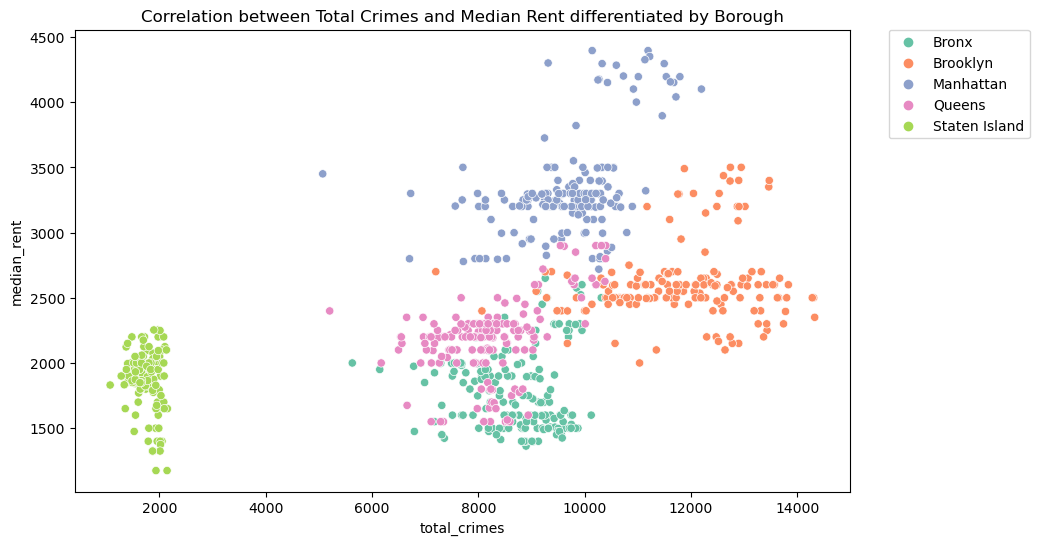

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_crimes', y='median_rent', hue='borough', palette='Set2')
plt.title('Correlation between Total Crimes and Median Rent differentiated by Borough')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py

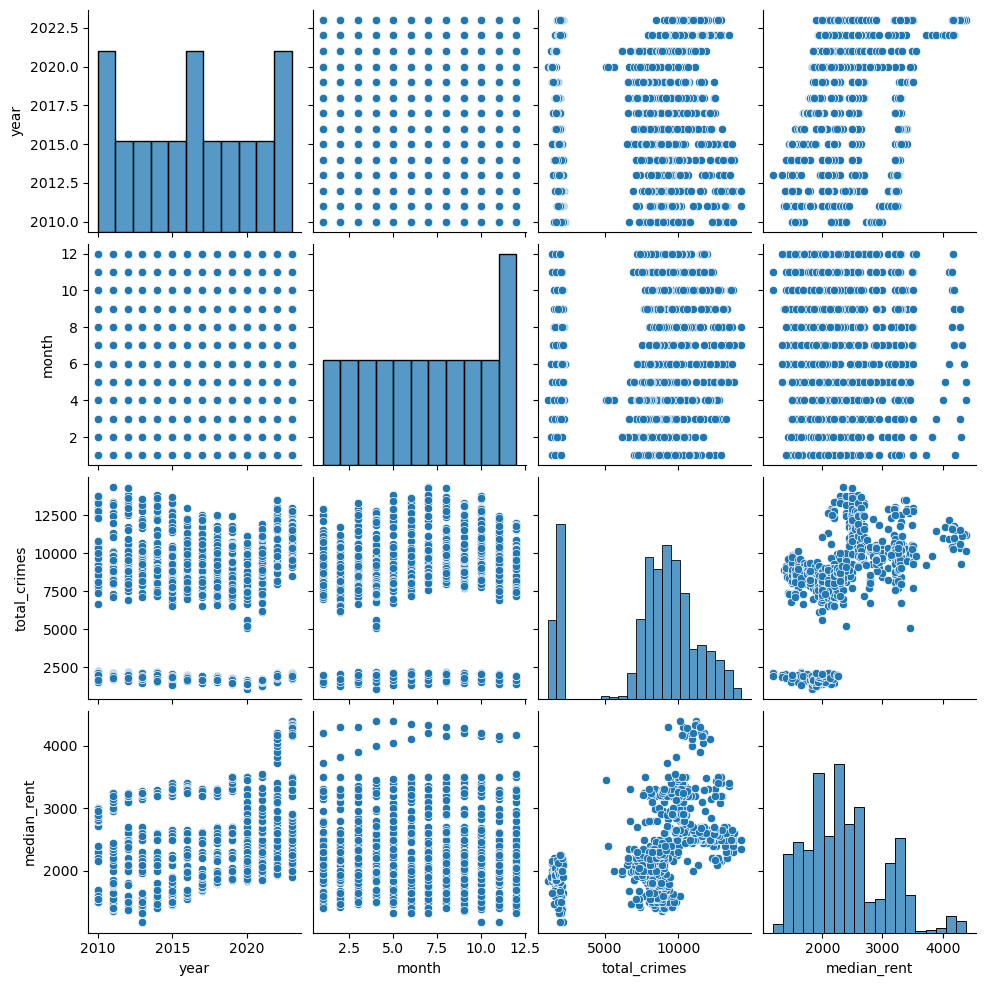

In [ ]:
sns.pairplot(df)
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


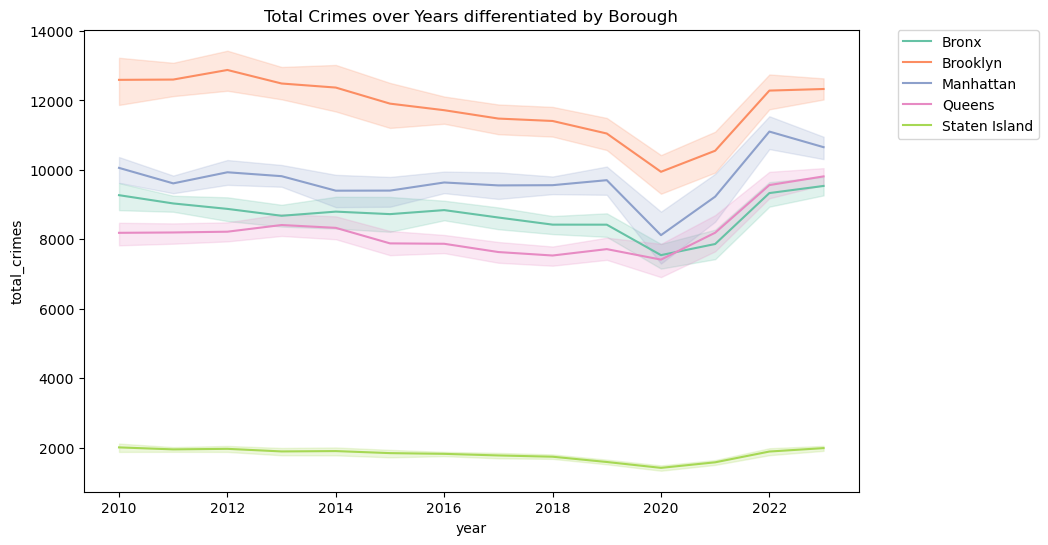

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='total_crimes', hue='borough', palette='Set2')
plt.title('Total Crimes over Years differentiated by Borough')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [ ]:
median_income

,borough,median_income_usd,year
0,"Bronx borough, Bronx County, New York",34264,2010
1,"Brooklyn borough, Kings County, New York",43567,2010
2,"Manhattan borough, New York County, New York",64971,2010
3,"Queens borough, Queens County, New York",55291,2010
4,"Staten Island borough, Richmond County, New York",71084,2010
...,...,...,...
60,"Bronx borough, Bronx County, New York",47036,2022
61,"Brooklyn borough, Kings County, New York",74692,2022
62,"Manhattan borough, New York County, New York",99880,2022
63,"Queens borough, Queens County, New York",82431,2022


In [16]:
precincts = pd.read_csv('../GOODDATA/NYPD_Arrest_Data__Year_to_Date__20240429.csv')

In [17]:
precincts

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63616,282877412,02/27/2024,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,K,60,0,45-64,M,WHITE HISPANIC,987154,149165,40.576100,-73.989545,POINT (-73.989545 40.5761)
63617,283628088,03/12/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,M,13,0,45-64,M,BLACK,985689,208933,40.740151,-73.994805,POINT (-73.994805 40.740151)
63618,283387006,03/07/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 160102A,F,K,73,0,25-44,M,BLACK,1008227,183789,40.671104,-73.913562,POINT (-73.913562 40.671104)
63619,283013910,03/01/2024,922.0,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110A4,M,K,83,0,25-44,F,BLACK,1007120,193913,40.698894,-73.917522,POINT (-73.91752179908735 40.698893568968515)


In [15]:
result = precincts.groupby('ARREST_BORO')['ARREST_PRECINCT'].unique()


NameError: name 'precincts' is not defined

In [ ]:
result

ARREST_BORO
B    12
K    23
M    23
Q    16
S     4
Name: ARREST_PRECINCT, dtype: int64

In [109]:
crime_rent_merge

,borough,year,month,total_crimes,median_rent
0,Bronx,2010,1,9361,1600.0
1,Bronx,2010,2,7688,1600.0
2,Bronx,2010,3,9356,1508.0
3,Bronx,2010,4,9442,1508.0
4,Bronx,2010,5,9541,1600.0
...,...,...,...,...,...
835,Staten Island,2023,8,2084,2000.0
836,Staten Island,2023,9,1807,2125.0
837,Staten Island,2023,10,2082,2200.0
838,Staten Island,2023,11,2013,2249.0


In [121]:
all_crime.head()

NameError: name 'all_crime' is not defined

In [130]:
robberies = get_dataframe(f"SELECT * FROM {schema}.crime_data cd WHERE offense='Robbery'")

Python-dotenv could not parse statement starting at line 14
Python-dotenv could not parse statement starting at line 18


In [131]:
robberies

,complaint_id,report_date,offense,crime_type,borough,incident_location,jurisdiction,sus_age_group,sus_race,sus_sex,latitude,longitude,vic_age_group,vic_race,vic_sex
0,10166233,2006-01-19,Robbery,Felony,Manhattan,Street,N.y. police dept,None,None,None,40.733294,-74.002803,18-24,Hispanic,Male
1,10154680,2006-01-19,Robbery,Felony,Queens,Street,N.y. police dept,None,None,None,40.739659,-73.774110,<18,White,Male
2,10392019,2006-01-19,Robbery,Felony,Bronx,Commercial building,N.y. police dept,None,None,None,40.855252,-73.896224,<18,Hispanic,Female
3,10142554,2006-01-19,Robbery,Felony,Manhattan,Other,N.y. police dept,None,None,None,40.852721,-73.931245,45-64,Hispanic,Male
4,10142548,2006-01-19,Robbery,Felony,Manhattan,Street,N.y. police dept,<18,None,None,40.864885,-73.924076,18-24,Hispanic,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313954,10156563,2006-01-19,Robbery,Felony,Brooklyn,Other,N.y. police dept,None,None,None,40.621993,-73.945970,<18,Hispanic,Male
313955,10164686,2006-01-19,Robbery,Felony,Queens,Street,N.y. police dept,None,None,None,40.697803,-73.786422,<18,Asian,Male
313956,10144845,2006-01-17,Robbery,Felony,Queens,Street,N.y. police dept,None,None,None,40.743264,-73.919629,<18,White,Male
313957,10129334,2006-01-17,Robbery,Felony,Queens,Street,N.y. police dept,None,None,None,40.735693,-73.814705,45-64,White,Female


In [14]:
get_dataframe(f"select * from {schema}.robberies limit 5")

Python-dotenv could not parse statement starting at line 14
Python-dotenv could not parse statement starting at line 18


,complaint_id,report_date,offense,crime_type,borough,incident_location,jurisdiction,sus_age_group,sus_race,sus_sex,latitude,longitude,vic_age_group,vic_race,vic_sex
0,170436056,2017-10-16,Robbery,Felony,Bronx,Residence - public housing,N.y. housing police,UNKNOWN,None,None,40.813503,-73.917678,25-44,Black,Female
1,170469022,2017-10-16,Robbery,Felony,Brooklyn,Commercial building,N.y. police dept,18-24,None,None,40.609986,-73.922689,UNKNOWN,Unknown,Business
2,170453366,2017-10-16,Robbery,Felony,Manhattan,Public school,N.y. police dept,UNKNOWN,None,None,40.810665,-73.956388,<18,Black,Male
3,170462279,2017-10-16,Robbery,Felony,Brooklyn,Street,N.y. police dept,<18,None,None,40.654330,-73.934564,<18,Black,Male
4,170436049,2017-10-16,Robbery,Felony,Manhattan,Residence - public housing,N.y. housing police,UNKNOWN,None,None,40.797107,-73.945898,18-24,Hispanic,Male
